<a href="https://colab.research.google.com/github/shashwat1998/YOLOv5/blob/master/YOLOv5_SoccerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Isabek/XmlToTxt
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/shashwat1998/YOLOv5

In [ ]:
%cd yolov5
!pip install -U -r requirements.txt
%cd ..

In [ ]:
%cd XmlToTxt
!pip install -U -r requirements.txt
%cd ..

In [7]:
!cp -rf XmlToTxt/* ./

In [22]:
!cp -rf YOLOv5/* ./

In [23]:
!python xmltotxt.py -xml labels/val -out labels/val1

In [24]:
!python xmltotxt.py -xml labels/train -out labels/train1

In [25]:
!rm -rf labels/train
!rm -rf labels/val

In [26]:
!mv labels/val1 labels/val
!mv labels/train1 labels/train

In [27]:
!mkdir -p soccer

In [28]:
!cp -rf images ./soccer/images/

In [29]:
!cp -rf labels ./soccer/labels/

In [30]:
%cd yolov5/

/content/yolov5


In [32]:
!python train.py --batch 16 --epochs 5 --data ./data/soccer.yaml --cfg ./models/yolov5s.yaml --weights ''

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/soccer.yaml', device='', epochs=5, evolve=False, img_size=[640, 640], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CPU

2020-07-02 08:30:30.140360: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/

              from  n    params  module                                  argumen

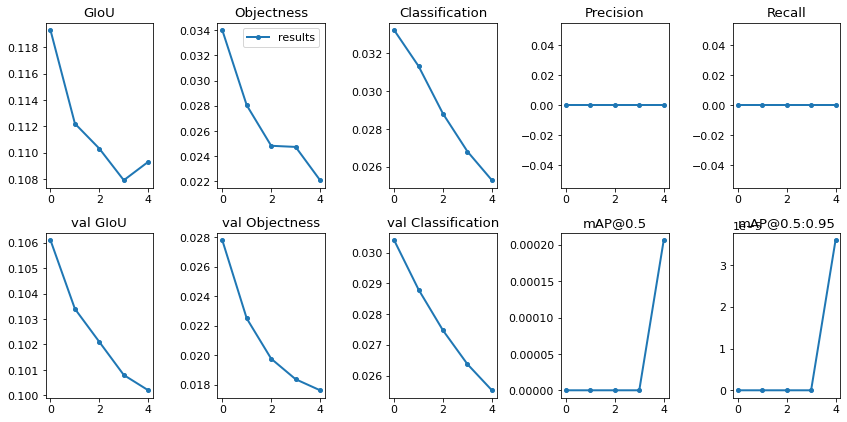

In [ ]:
from utils.utils import plot_results
plot_results()

In [35]:
!python test.py --weights weights/last.pt --data ./data/soccer.yaml --img 640 --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/soccer.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights='weights/last.pt')
Using CPU

Model Summary: 191 layers, 7.25779e+06 parameters, 0 gradients
Fusing layers...
Model Summary: 140 layers, 7.24922e+06 parameters, 6.61683e+06 gradients
Caching labels /content/soccer/labels/val (40 found, 0 missing, 0 empty, 0 duplicate, for 40 images): 100% 40/40 [00:00<00:00, 5626.73it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:16<00:00,  8.35s/it]
                 all          40          40           0           0    1.03e-05    1.03e-06
                ball          40          40           0           0    1.03e-05    1.03e-06
Speed: 306.7/12.0/318.8 ms inference/NMS/total per 640x640 image at batch-size 32


In [36]:
!python test.py --weights weights/best.pt --data ./data/soccer.yaml --img 640 --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/soccer.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights='weights/best.pt')
Using CPU

Model Summary: 191 layers, 7.25779e+06 parameters, 0 gradients
Fusing layers...
Model Summary: 140 layers, 7.24922e+06 parameters, 6.61683e+06 gradients
Caching labels /content/soccer/labels/val (40 found, 0 missing, 0 empty, 0 duplicate, for 40 images): 100% 40/40 [00:00<00:00, 7916.40it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:16<00:00,  8.46s/it]
                 all          40          40           0           0           0           0
                ball          40          40           0           0           0           0
Speed: 309.2/13.2/322.4 ms inference/NMS/total per 640x640 image at batch-size 32


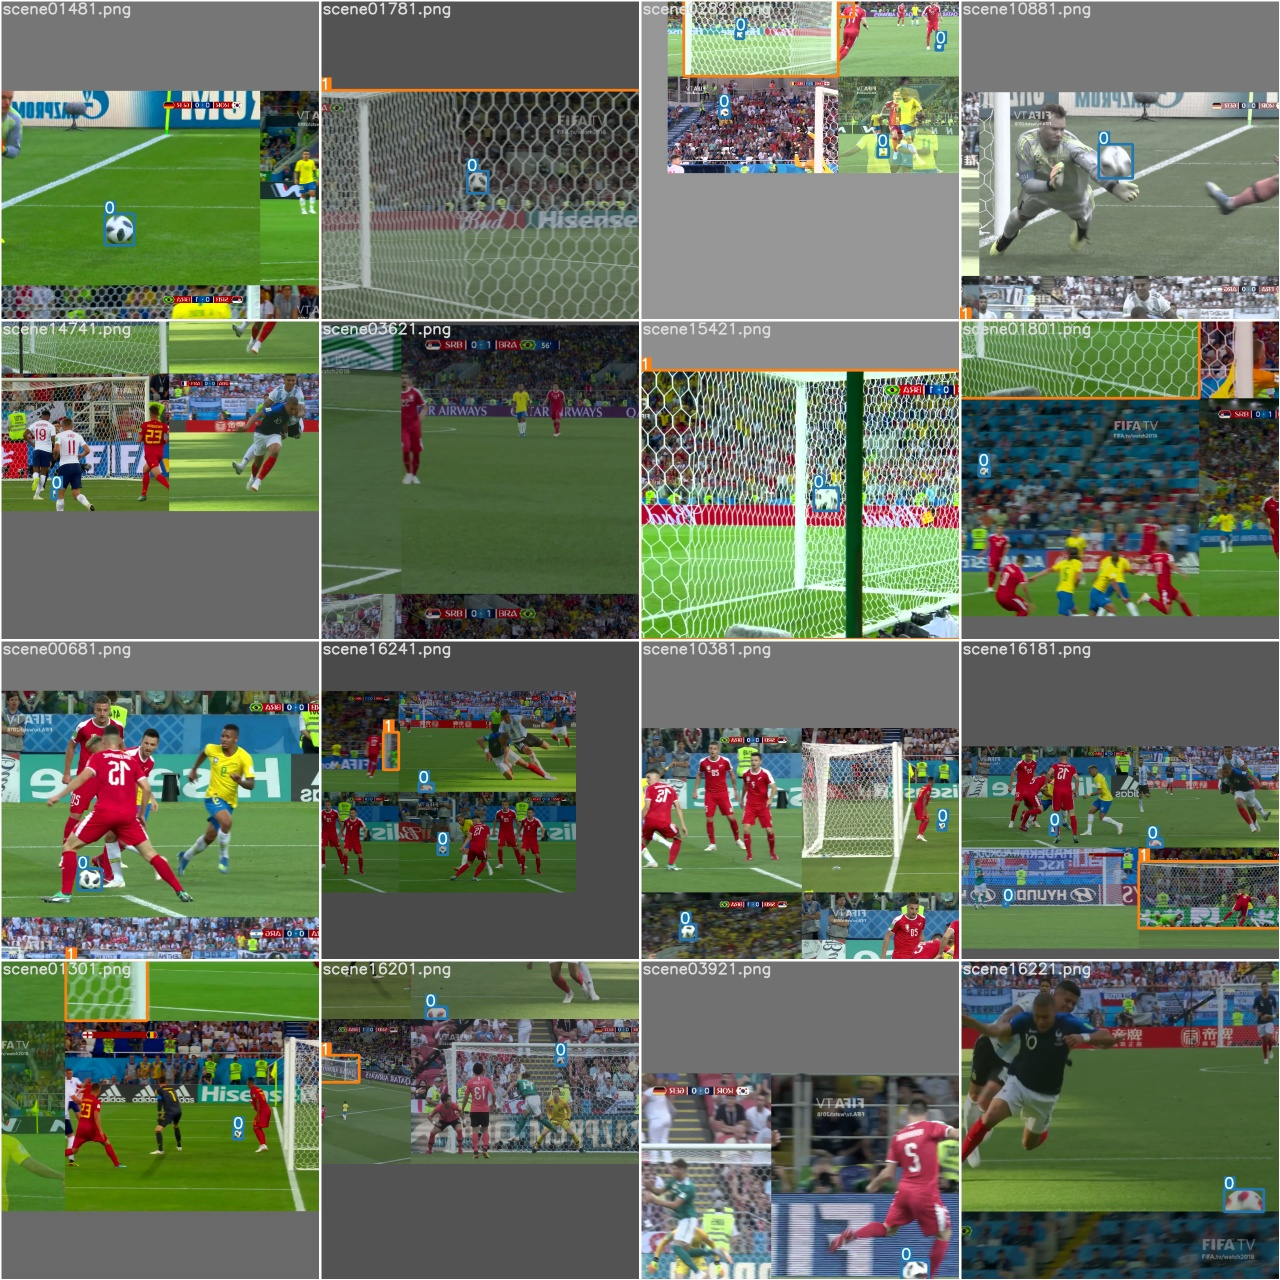

In [40]:
from IPython.display import Image, clear_output  # to display images
Image(filename='./train_batch0.jpg', width=900)

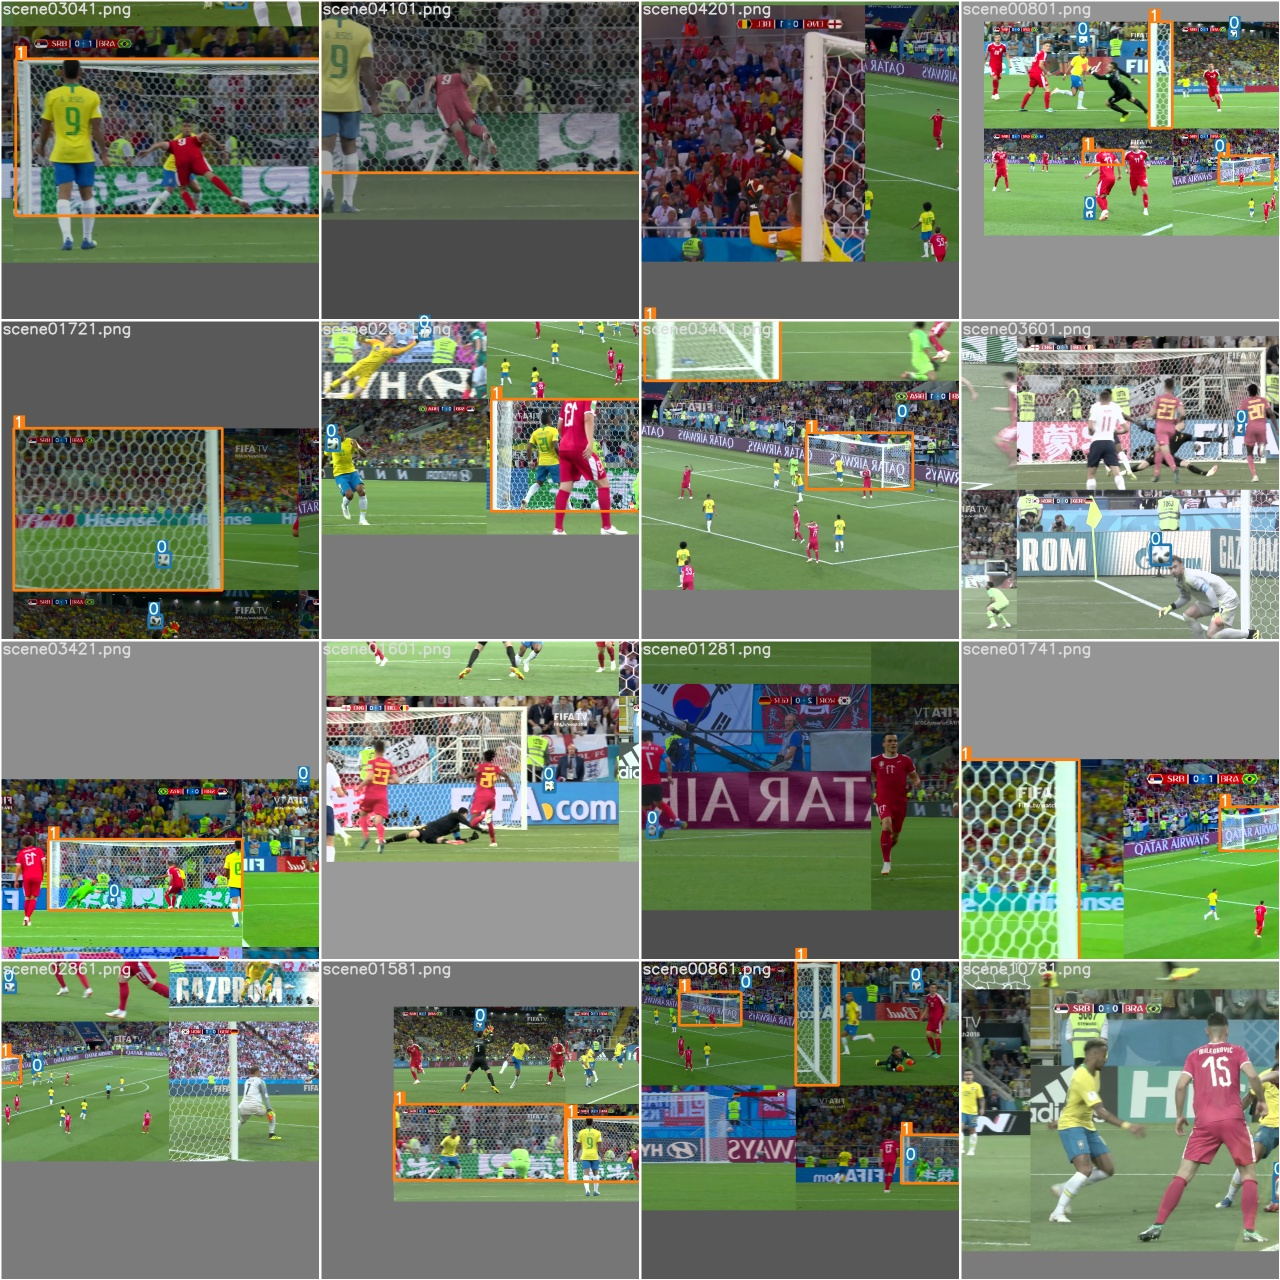

In [41]:
Image(filename='./train_batch1.jpg', width=900)

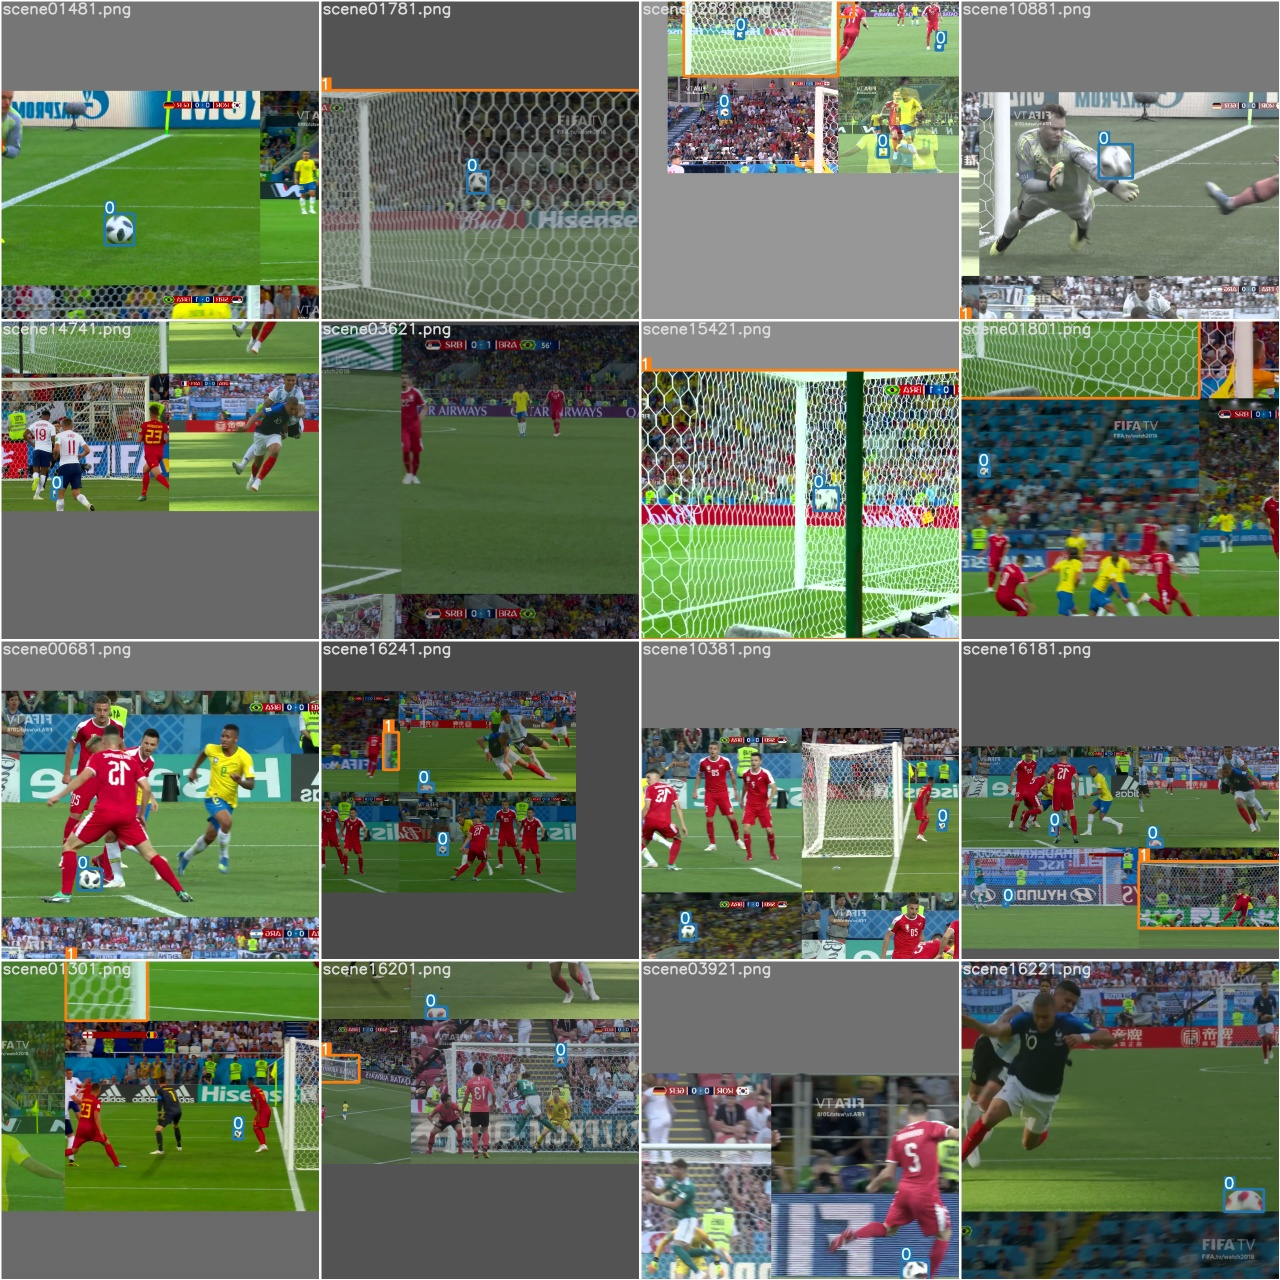

In [42]:

Image(filename='./train_batch2.jpg', width=900)